In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [3]:
import pandas as pd
import os
import glob
import numpy as np
import cv2
from tqdm import tqdm
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from numpy.random import seed
seed(1)

In [4]:
df=pd.read_csv("C:/Users/hp/Desktop/vision_project/HAM10000_metadata.csv")

In [5]:
df.shape

(10015, 7)

In [6]:
import os
import glob

# Windows için doğru yol yazımı
images_path = {
    os.path.splitext(os.path.basename(x))[0]: x
    for x in glob.glob('C:/Users/hp/Desktop/vision_project/HAM1000_images/*.jpg')
}

In [7]:
len(images_path)

10015

In [8]:
num_unique_id = df["image_id"].nunique()
print(f"There are {num_unique_id} unique image IDs in the dataset")

There are 10015 unique image IDs in the dataset


In [9]:
df['path'] = df['image_id'].map(images_path.get)
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,C:/Users/hp/Desktop/vision_project/HAM1000_ima...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,C:/Users/hp/Desktop/vision_project/HAM1000_ima...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,C:/Users/hp/Desktop/vision_project/HAM1000_ima...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,C:/Users/hp/Desktop/vision_project/HAM1000_ima...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,C:/Users/hp/Desktop/vision_project/HAM1000_ima...


In [10]:
lesion_type_dict = {
    'nv':'Melanocytic Nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [11]:
lesion_ID_dict = {
    'nv': 0,
    'mel': 1,
    'bkl': 2,
    'bcc': 3,
    'akiec': 4,
    'vasc': 5,
    'df': 6
}

In [12]:
df['cell_type'] = df['dx'].map(lesion_type_dict.get)
df['lesion_ID'] = df['dx'].map(lesion_ID_dict.get)

In [13]:
y = df["lesion_ID"]
y.head()

0    2
1    2
2    2
3    2
4    2
Name: lesion_ID, dtype: int64

In [14]:
y = df["lesion_ID"]
y = np.array(y)
print(y.shape)

(10015,)


In [15]:
def get_img(img_path):
  img = cv2.imread(img_path,1)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(71,71))
  return img

# 1 → Renkli (BGR formatında)
# 0 → Gri (grayscale)
# -1 → Orijinal (alfa kanalı dahil)

In [16]:
x = []
for img_name in tqdm(df['path'].values):
  x.append(get_img(img_name))

100%|██████████| 10015/10015 [01:07<00:00, 148.52it/s]


In [17]:
#Convert x to float arrays and normalize it
x = np.array(x)/255
print(x.shape)

(10015, 71, 71, 3)


In [18]:
lesion_names = ['Melanocytic nevi','Melanoma','Benign keratosis-like lesions ',
               'Basal cell carcinoma','Actinic keratoses','Vascular lesions',
               'Dermatofibroma']

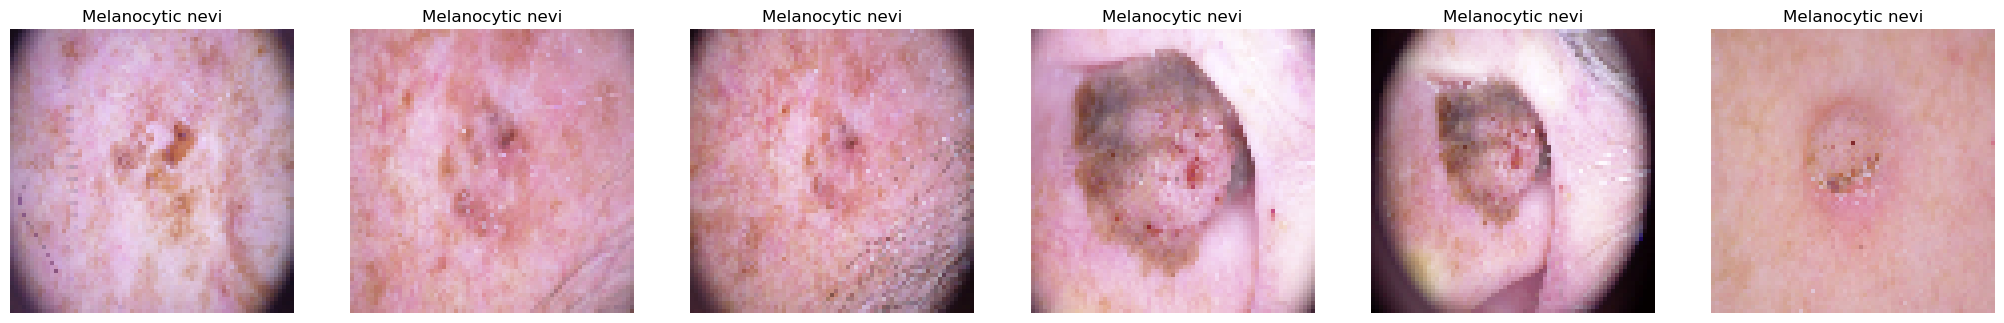

In [19]:
plt.figure(figsize = (30, 15))
for i in range(1, 7, ):
    plt.subplot(1, 7, i)
    plt.imshow(x[i])
    plt.title(lesion_names[np.argmax(y[i])])
    plt.axis("off")
plt.show()

## ***Pre-Proccessing Stage***

In [20]:
# x = df['path']
# y = df['lesion_ID']

In [21]:

#split the x and y into (x_train, x_test) and (y_train, y_test) respectively
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.10,random_state=28,stratify=y)

#split x_train and y_train into (x_train, x_val) and (y_train, y_val)
x_train,x_val,y_train,y_val =  train_test_split(x_train,y_train,test_size=0.10,random_state=28,stratify=y_train)

In [22]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(8111, 71, 71, 3)
(902, 71, 71, 3)
(1002, 71, 71, 3)
(8111,)
(902,)
(1002,)


In [23]:
y_id = y_train
y_id

array([2, 0, 1, ..., 1, 0, 0], dtype=int64)

In [24]:
y_idtest = y_test
y_idtest

array([0, 0, 0, ..., 0, 3, 2], dtype=int64)

In [25]:
# One-Hot Encoding values, loss fonksiyonunun anlaması için
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes =7)
y_val = to_categorical(y_val , num_classes=7)

In [26]:
# print the shapes of the y variables
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(8111, 7)
(1002, 7)
(902, 7)


In [27]:
df['lesion_ID'].value_counts()

lesion_ID
0    6705
1    1113
2    1099
3     514
4     327
5     142
6     115
Name: count, dtype: int64

## **Resolving the Unbalanced data by weight assignment**



In [28]:
from sklearn.utils import class_weight

In [29]:
#alfabetik olarak diziyor
class_labels = np.unique(df['dx'])
y = df["dx"]
class_weights = class_weight.compute_class_weight('balanced', classes = class_labels, y = y)
class_weights

array([ 4.37527304,  2.78349083,  1.30183284, 12.44099379,  1.28545758,
        0.21338021, 10.07545272])

In [30]:
class_weights = dict(zip([0,1,2,3,4,5,6], [4.37527304,  2.78349083,  1.30183284, 12.44099379,  1.28545758, 0.21338021, 10.07545272]))
class_weights

{0: 4.37527304,
 1: 2.78349083,
 2: 1.30183284,
 3: 12.44099379,
 4: 1.28545758,
 5: 0.21338021,
 6: 10.07545272}

In [31]:
# Import the necessary libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D, Activation, Input, Reshape, Permute, concatenate, GlobalAveragePooling2D, AveragePooling2D, Multiply, Lambda
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.metrics import Recall
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop
import shutil
from keras.applications.inception_v3 import InceptionV3

In [32]:
# Declare the filepath for the saved model
filepath = "HAM10000_images.keras"

In [33]:
# Add an early stopping
early_stop = EarlyStopping(monitor='val_accuracy',patience=6,mode='auto', restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving.
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor= np.sqrt(0.1), patience=4, verbose=1,cooldown=0,
                               mode='auto',min_delta=0.0001, min_lr=0.5e-6)

# Declare a checkpoint to save the best version of the model
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,
                             mode='auto', save_weights_only=False)

In [34]:
callbacks_list = [checkpoint, reduce_lr, early_stop]

# ***CNN+DROPOUT***

In [35]:
import tensorflow as tf
import tensorflow.keras
model = tensorflow.keras.Sequential([
    layers.InputLayer(input_shape=[71,71,3]),

    # Block One
    layers.BatchNormalization(),
    layers.Conv2D(filters=96, kernel_size=3, activation="relu"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),

    # Block Two
    layers.BatchNormalization(),
    layers.Conv2D(filters=512, kernel_size=3, activation="relu",
                  padding = "same"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),

    # Block Three
    layers.BatchNormalization(),
    layers.Conv2D(filters=1024, kernel_size=3, activation="relu",
                  padding = "same"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),

    # Block four
    layers.BatchNormalization(),
    layers.Conv2D(filters=1024, kernel_size=3, activation="relu",
                  padding = "same"),
    layers.MaxPool2D(pool_size = (3, 3), strides = (2, 2)),

    # Flatten
    layers.BatchNormalization(),
    layers.Flatten(),

    # Block Five
    layers.Dense(4096, activation="relu"),
    layers.Dropout(0.5),

    # Block Six
    layers.Dense(4096, activation="relu"),
    layers.Dropout(0.5),

    # output
    layers.Dense(7, activation='softmax')
])

In [36]:
#Compile the Model
optimizer = tf.keras.optimizers.Adam(epsilon = 0.01)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 71, 71, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 69, 69, 96)        2688      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 96)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 34, 34, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 512)       442880    
                                                        

In [38]:
historyCNN = model.fit(x_train,
                     y_train,
                     epochs=40,
                     batch_size=32,
                     validation_data=(x_val, y_val), 
                     callbacks=callbacks_list)

Epoch 1/40
254/254 [==============================] - ETA: 0s - loss: 1.3976 - accuracy: 0.6375
Epoch 1: val_accuracy improved from -inf to 0.21397, saving model to HAM10000_images.keras
254/254 [==============================] - 592s 2s/step - loss: 1.3976 - accuracy: 0.6375 - val_loss: 1.9539 - val_accuracy: 0.2140 - lr: 0.0010
Epoch 2/40
254/254 [==============================] - ETA: 0s - loss: 0.9491 - accuracy: 0.6820
Epoch 2: val_accuracy improved from 0.21397 to 0.69845, saving model to HAM10000_images.keras
254/254 [==============================] - 587s 2s/step - loss: 0.9491 - accuracy: 0.6820 - val_loss: 0.7889 - val_accuracy: 0.6984 - lr: 0.0010
Epoch 3/40
254/254 [==============================] - ETA: 0s - loss: 0.8035 - accuracy: 0.7130
Epoch 3: val_accuracy improved from 0.69845 to 0.71175, saving model to HAM10000_images.keras
254/254 [==============================] - 605s 2s/step - loss: 0.8035 - accuracy: 0.7130 - val_loss: 0.7655 - val_accuracy: 0.7118 - lr: 0.001

In [39]:
pd.DataFrame(historyCNN.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,1.397580,0.637529,1.953906,0.213969,0.001000
1,0.949142,0.682037,0.788861,0.698448,0.001000
2,0.803466,0.712982,0.765494,0.711752,0.001000
3,0.760366,0.725804,0.681129,0.749446,0.001000
4,0.716760,0.738010,0.687754,0.746120,0.001000
5,0.697760,0.740722,0.722680,0.732816,0.001000
6,0.688338,0.751079,0.726396,0.732816,0.001000
7,0.671025,0.758969,0.729986,0.743902,0.001000
8,0.559289,0.794107,0.607705,0.777162,0.000316
9,0.513260,0.808532,0.592896,0.791574,0.000316


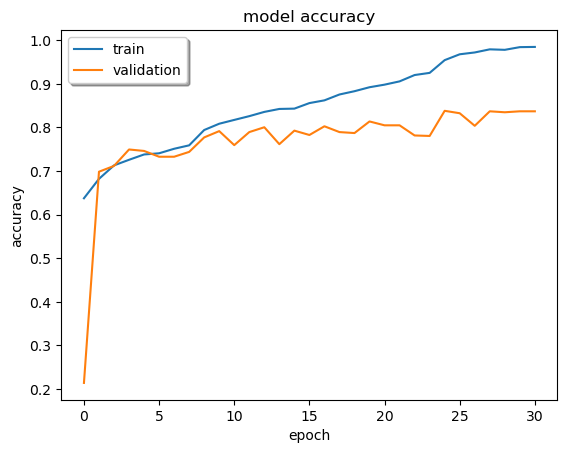

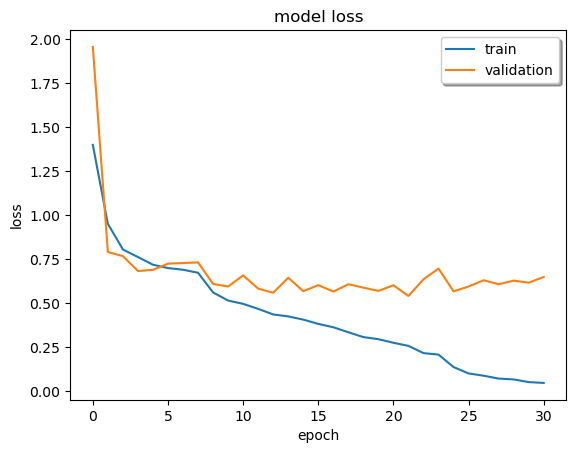

In [40]:
# summarize history for accuracy
plt.plot(historyCNN.history['accuracy'])
plt.plot(historyCNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left', shadow = True)
plt.show()
# summarize history for loss
plt.plot(historyCNN.history['loss'])
plt.plot(historyCNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best', shadow = True)
plt.show()

In [41]:
# Make predictions
predictionsCNN = model.predict_generator(x_test, verbose=1)

C:\Users\hp\AppData\Local\Temp\ipykernel_17704\2846021091.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictionsCNN = model.predict_generator(x_test, verbose=1)


32/32 [==============================] - 14s 421ms/step


In [42]:
predictionsCNN

array([[8.8416457e-01, 1.0857236e-01, 6.7308447e-03, ..., 2.0222578e-04,
        4.1865147e-05, 2.2633982e-04],
       [6.7341942e-01, 2.5992107e-02, 3.0040976e-01, ..., 2.7910419e-05,
        3.1532025e-05, 4.0521179e-05],
       [1.0000000e+00, 2.1108819e-09, 3.4704275e-08, ..., 6.2813296e-11,
        8.4052117e-13, 1.3085856e-09],
       ...,
       [9.9997854e-01, 2.0999521e-05, 3.3768637e-07, ..., 2.4540334e-08,
        6.5471162e-10, 3.5026780e-08],
       [1.3823185e-02, 4.1923625e-03, 3.4880643e-03, ..., 5.6535834e-03,
        6.0370081e-04, 1.9296961e-01],
       [1.2693466e-01, 2.9756188e-01, 5.7349193e-01, ..., 1.5352292e-03,
        4.3988261e-05, 9.8773780e-05]], dtype=float32)

In [43]:
# Convert predicted values from an array to a Dataframe and round up to 4 decimal place
# For each row there are predicted % for each of the classes 0 t0 6
pred_CNN = np.around(pd.DataFrame(predictionsCNN), 4)
pred_CNN

,0,1,2,3,4,5,6
0,0.8842,0.1086,0.0067,0.0001,0.0002,0.0000,0.0002
1,0.6734,0.0260,0.3004,0.0001,0.0000,0.0000,0.0000
2,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9792,0.0041,0.0160,0.0000,0.0000,0.0000,0.0006
4,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...
997,0.0005,0.9869,0.0023,0.0000,0.0103,0.0000,0.0000
998,0.6859,0.3108,0.0032,0.0000,0.0000,0.0000,0.0000
999,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1000,0.0138,0.0042,0.0035,0.7793,0.0057,0.0006,0.1930


In [44]:
# Obtain the indice of the maximum value for each row
y_pred_CNN = np.argmax(predictionsCNN, axis = 1)
y_pred_CNN

array([0, 0, 0, ..., 0, 3, 2], dtype=int64)

# Model **Değerlendirme**

In [45]:
# from tensorflow.keras.models import load_model
# model = load_model("cnn_final.keras")


In [46]:
# from sklearn.metrics import confusion_matrix
# import numpy as np
# y_pred = np.load("y_pred.npy")
# y_test = np.load("y_true.npy")


In [56]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix( y_idtest, y_pred_CNN)

In [57]:
print(cm)

[[635  15  14   2   2   2   1]
 [ 55  48   6   0   2   0   0]
 [ 30   9  66   4   1   0   0]
 [  4   3   4  33   5   1   1]
 [  2   0   4   4  23   0   0]
 [  1   0   0   0   0  13   0]
 [  5   1   0   2   2   0   2]]


In [58]:
class_names = [
    'Melanositik Ben',         # 0
    'Melanom',                 # 1
    'Benign Keratoz',          # 2
    'Bazal Hücreli Karsinom',  # 3
    'Aktinik Keratoz',         # 4
    'Vasküler Lezyon',         # 5
    'Dermatofibrom'            # 6
]

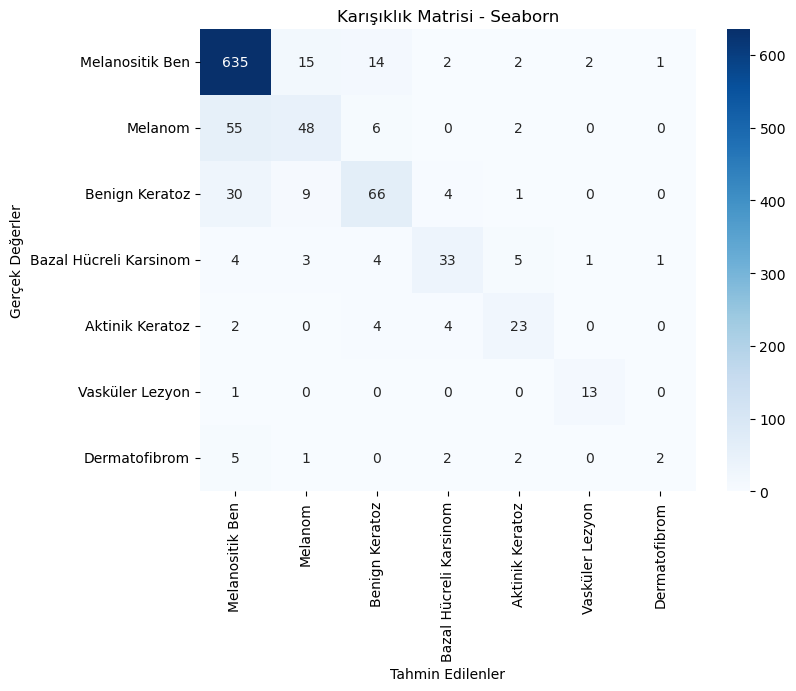

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilenler')
plt.title('Karışıklık Matrisi - Seaborn')
plt.show()

In [60]:
y_pred_CNN

array([0, 0, 0, ..., 0, 3, 2], dtype=int64)

In [47]:
# Determine the accuracy score of the modelCNN
accuracy_score(y_pred_CNN,y_idtest)

0.8183632734530938

In [48]:
print(classification_report(y_idtest,y_pred_CNN))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       671
           1       0.63      0.43      0.51       111
           2       0.70      0.60      0.65       110
           3       0.73      0.65      0.69        51
           4       0.66      0.70      0.68        33
           5       0.81      0.93      0.87        14
           6       0.50      0.17      0.25        12

    accuracy                           0.82      1002
   macro avg       0.70      0.63      0.65      1002
weighted avg       0.80      0.82      0.81      1002



In [49]:
# Show the accuracy of the model by class for each of the lesion in the dataset
class_accuracy_CNN = []

for i in range(7):
    acc = round(np.mean(y_idtest[y_idtest == i] == y_pred_CNN[y_idtest == i]),2)
    lab_name = lesion_names[i]
    print('The Model accuracy for ',lab_name,'=',acc)
    class_accuracy_CNN.append(acc)

The Model accuracy for  Melanocytic nevi = 0.95
The Model accuracy for  Melanoma = 0.43
The Model accuracy for  Benign keratosis-like lesions  = 0.6
The Model accuracy for  Basal cell carcinoma = 0.65
The Model accuracy for  Actinic keratoses = 0.7
The Model accuracy for  Vascular lesions = 0.93
The Model accuracy for  Dermatofibroma = 0.17


In [50]:
acc_tab = pd.DataFrame(list(zip(lesion_ID_dict, class_accuracy_CNN)))
acc_tab.columns = ["Lesion", "Accuracy"]
acc_tab

,Lesion,Accuracy
0,nv,0.95
1,mel,0.43
2,bkl,0.60
3,bcc,0.65
4,akiec,0.70
5,vasc,0.93
6,df,0.17


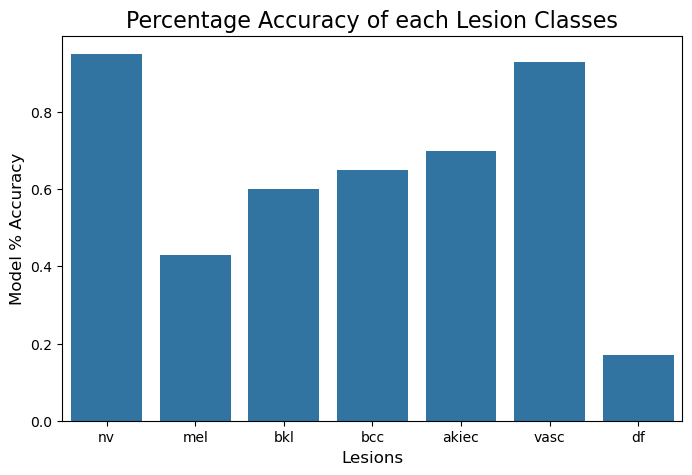

In [51]:
plt.figure(figsize = (8, 5))
sns.barplot(data=acc_tab, x="Lesion", y= "Accuracy", hue=None)
plt.xlabel('Lesions', size=12)
plt.ylabel('Model % Accuracy', size=12)
plt.title('Percentage Accuracy of each Lesion Classes', size=16)
plt.show()

In [52]:
# 1️⃣ Model
model.save("cnn_final.keras")

# 2️⃣ History
import pickle
with open("cnn_history.pkl","wb") as f:
    pickle.dump(historyCNN.history, f)

# 3️⃣ Tahminler
np.save("y_pred.npy", y_pred_CNN)
np.save("y_true.npy", y_idtest)


In [53]:
from tensorflow.keras.models import load_model

model = load_model("cnn_final.keras")
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 71, 71, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 69, 69, 96)        2688      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 34, 96)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 34, 34, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 512)       442880    
                                                        

In [54]:
for layer in model.layers:
    print(layer.name, layer.output_shape)


batch_normalization (None, 71, 71, 3)
conv2d (None, 69, 69, 96)
max_pooling2d (None, 34, 34, 96)
batch_normalization_1 (None, 34, 34, 96)
conv2d_1 (None, 34, 34, 512)
max_pooling2d_1 (None, 16, 16, 512)
batch_normalization_2 (None, 16, 16, 512)
conv2d_2 (None, 16, 16, 1024)
max_pooling2d_2 (None, 7, 7, 1024)
batch_normalization_3 (None, 7, 7, 1024)
conv2d_3 (None, 7, 7, 1024)
max_pooling2d_3 (None, 3, 3, 1024)
batch_normalization_4 (None, 3, 3, 1024)
flatten (None, 9216)
dense (None, 4096)
dropout (None, 4096)
dense_1 (None, 4096)
dropout_1 (None, 4096)
dense_2 (None, 7)


In [55]:
model.get_weights()[0].shape


(3,)